In [1]:
!pip install pymongo

In [153]:
# Imports
import bson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import codecs
import re
import os.path

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import string
import re
from nltk.stem import PorterStemmer

import nltk

from nltk.stem import WordNetLemmatizer, PorterStemmer

import unicodedata

from nltk.corpus import stopwords, wordnet
from nltk.tag import pos_tag

import seaborn as sns


from sklearn.decomposition import TruncatedSVD
from scipy.ndimage import gaussian_filter1d
from matplotlib_venn import venn2

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline


In [3]:
# Open and read the BSON files
with open("./trictrac/details.bson", "rb") as f:
    details = bson.decode_all(f.read())


with open("./trictrac/infos_scrapping.bson", "rb") as f:
    infos = bson.decode_all(f.read())

with open("./trictrac/jeux.bson", "rb") as f:
    jeux = bson.decode_all(f.read())


with open("./trictrac/avis.bson", "rb") as f:
    avis = bson.decode_all(f.read())

In [4]:
len_details=len(details)
len_jeux=len(jeux)
len_infos=len(infos)
len_avis=len(avis)
print(f"Longeur de chaque table de données avis: {len_avis}, jeux: {len_jeux}, infos: {len_infos}, details : {len_details}")


Longeur de chaque table de données avis: 246524, jeux: 20235, infos: 532, details : 20234


In [5]:
pdAvis = pd.DataFrame(avis)
print("\nAvis:\n", pdAvis.describe())


Avis:
                note
count  246524.00000
mean        7.59307
std         2.12589
min         0.00000
25%         6.00000
50%         8.00000
75%         9.40000
max        10.00000


In [231]:
pdAvis.head()

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length,comment_clean,sentiment,sentiment_categorie,note_categorie,cluster
0,63c6726ea81f3e3016af9a56,Monsieur Guillaume,2021-01-27 11:06:44,Voyages sur les ailes des papillons,8.0,https://www.trictrac.net/avis/vraiment-bon-12514,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Lorsque le jeu est jeu, bon, réflexif, joli po...",619.0,lorsque bon réflexif joli sensible style illus...,0.443182,Positif,Moyenne (7-8),0
1,63c6726ea81f3e3016af9a57,morlockbob,2020-10-18 10:04:21,le festival de Michoacan,7.0,https://www.trictrac.net/avis/le-festival-de-m...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Comment continuer après un mega hit ? Simpleme...,883.0,comment continuer après mega hit simplement ap...,-0.020000,Neutre,Moyenne (7-8),0
2,63c6726ea81f3e3016af9a58,SwatSh,2021-02-01 08:35:08,Vivez la migration des monarques,7.0,https://www.trictrac.net/avis/vivez-la-migrati...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...",540.0,vin mariposas elizabeth hargrave parvient simu...,0.085000,Neutre,Moyenne (7-8),0
4,63c6726ea81f3e3016af9a5a,prunelles,2021-05-24 12:43:18,Envolez-moi,9.0,https://www.trictrac.net/avis/envolez-moi,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,"Très joli bijou que ce jeu-là ! Le matériel, l...",540.0,très joli bijou là matériel illustrations hist...,0.299000,Neutre,Haute (9-10),0
5,63c6726ea81f3e3016af9a5b,BSI40,2022-09-23 17:16:27,Manque un peu de souffle,7.0,https://www.trictrac.net/avis/manque-un-peu-de...,Mariposas,https://www.trictrac.net/jeu-de-societe/maripo...,True,Mariposas est plutôt beau avec un grand platea...,1744.0,mariposas plutôt beau grand plateau petits pap...,0.052372,Neutre,Moyenne (7-8),1


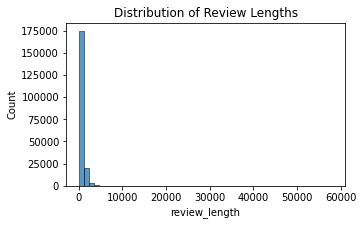

Average review length: 619 characters


In [6]:
pdAvis['review_length'] = pdAvis['comment'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

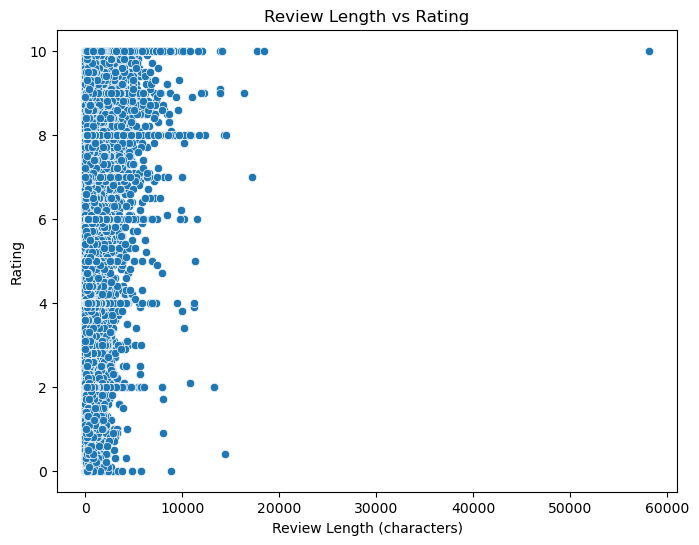

In [82]:
# Analyze if review length correlates with rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pdAvis, x='review_length', y='note')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.show()

In [83]:
#2 reviews with around 60000 words that arent interesting to keep (they are spam)
pdAvis[pdAvis["review_length"] >50000]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0


In [84]:
pdAvis[pdAvis["author"]== "The Lonesome Meeple"]

,_id,author,date_published,title_review,note,review_href,title,url,treated,comment,review_length
21474,63c67500993b727dc2a7a0d7,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0
22193,63c67506993b727dc2a7a3a6,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
79884,63c6776e993b727dc2a88501,The Lonesome Meeple,2020-04-16 18:24:56,Histoire de Meeples #1 Sub Terra [Partie narra...,10.0,https://www.trictrac.net/avis/sub-terra-partie...,Sub Terra,https://www.trictrac.net/jeu-de-societe/sub-te...,True,Récit à retrouver sur mon blog Histoires de Me...,58097.0
84272,63c67799993b727dc2a89625,The Lonesome Meeple,2020-04-21 22:32:46,Histoire de Meeples #4 SOS Dino |Partie Narrat...,10.0,https://www.trictrac.net/avis/histoire-de-meep...,SOS DINO,https://www.trictrac.net/jeu-de-societe/sos-di...,True,Récit à retrouver avec photos sur mon blog His...,12044.0


In [85]:
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246524, 11)


In [7]:
pdAvis=pdAvis[pdAvis["review_length"] != 58097.0]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (246522, 11)


In [ ]:
#enlever les doublons
pdAvis = pdAvis.copy()
print(f"Dimensions de pdAvis avant nettoyage : {pdAvis.shape}")
pdAvis.drop_duplicates(subset=['author', 'date_published', 'title_review', 'note', 'review_href', 'title', 'url', 'treated', 'comment' , 'review_length'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis avant nettoyage : (246522, 11)
Dimensions de pdAvis après nettoyage : (176242, 11)


In [9]:
# Supprimer les lignes où 'comment' est NaN ou vide
pdAvis.dropna(subset=['comment'], inplace=True)
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (150723, 11)


In [10]:
# Optionnel : enlever aussi les commentaires vides (juste espaces)
pdAvis = pdAvis[pdAvis['comment'].str.strip() != ""]
print(f"Dimensions de pdAvis après nettoyage : {pdAvis.shape}")

Dimensions de pdAvis après nettoyage : (142845, 11)


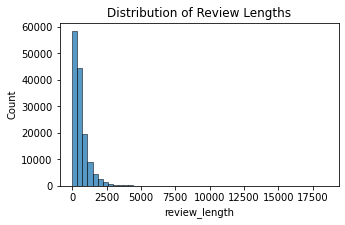

Average review length: 640 characters


In [12]:
#We redid the statistcs about the review length to verify, all is good,the highest review is real
plt.figure(figsize=(5, 3))
sns.histplot(data=pdAvis, x='review_length',bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

print(f"Average review length: {pdAvis['review_length'].mean():.0f} characters")

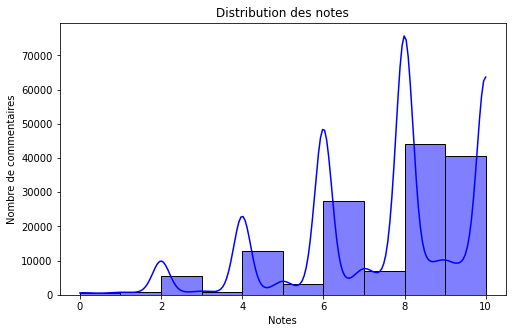

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Tracer l'histogramme des notes
plt.figure(figsize=(8,5))
sns.histplot(pdAvis["note"], bins=10, kde=True, color="blue")
plt.xlabel("Notes")
plt.ylabel("Nombre de commentaires")
plt.title("Distribution des notes")
plt.show()


**on remarque que il y a plus de commentaires qui sont bien notes**

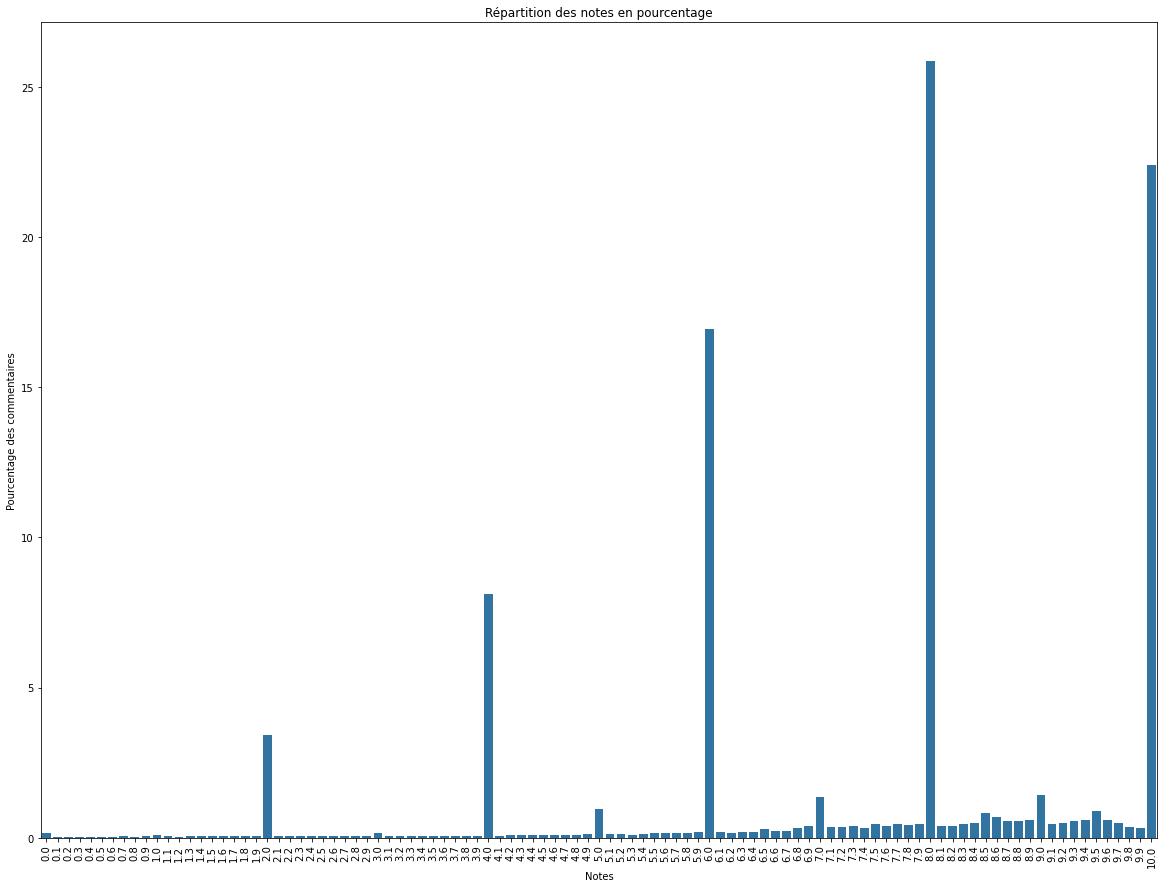

In [22]:
pdAvis_of = pdAvis

note_counts = pdAvis_of["note"].value_counts(normalize=True) * 100

plt.figure(figsize=(20, 15))
sns.barplot(x=note_counts.index, y=note_counts.values)
plt.xlabel("Notes")
plt.ylabel("Pourcentage des commentaires")
plt.title("Répartition des notes en pourcentage")
plt.xticks(rotation=90)
plt.show()


In [23]:
pdAvis_of[pdAvis_of["note"] > 8]["comment"]

4         Très joli bijou que ce jeu-là ! Le matériel, l...
19        Après une partie à 2 joueurs, une deuxième à 4...
26        L'édition est superbe et le matériel également...
34        Vin d'jeu: Ce « nouveau » jeu est plus une nou...
35        En famille nous avons bien poncé son grand frè...
                                ...                        
246493    Salut\n\nConnu autour d'un verre dans un bar l...
246499    Je me situe un peu, je suis un grand joueur de...
246500    gérer ca chance, voila le defit principal du j...
246507    Twilight revient à ce qu'ils savent faire de m...
246509    vous etes dans une ville infesté de mort vivan...
Name: comment, Length: 47810, dtype: object

note_categorie
Haute (9-10)     47810
Basse (0-6)      47734
Moyenne (7-8)    47099
Name: count, dtype: int64


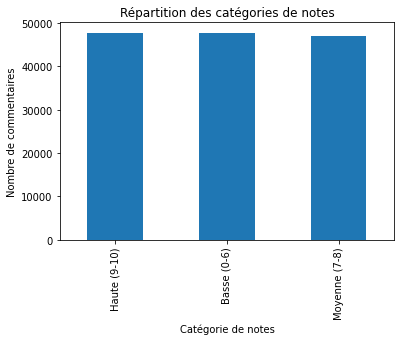

In [24]:
# Regrouper les notes en trois catégories
pdAvis_of["note_categorie"] = pd.cut(pdAvis_of["note"], bins=[0,6,8,10], labels=["Basse (0-6)", "Moyenne (7-8)", "Haute (9-10)"])
#L'intervalle [0,6] est en réalité ]0,6] (exclut 0, inclut 6).L'intervalle [7,8] est ]6,8].L'intervalle [9,10] est ]8,10]
# Afficher la répartition des catégories
print(pdAvis_of["note_categorie"].value_counts())
pdAvis_of["note_categorie"].value_counts().plot(kind="bar")
plt.xlabel("Catégorie de notes")
plt.ylabel("Nombre de commentaires")
plt.title("Répartition des catégories de notes")
plt.show()


In [25]:
!pip install textblob-fr

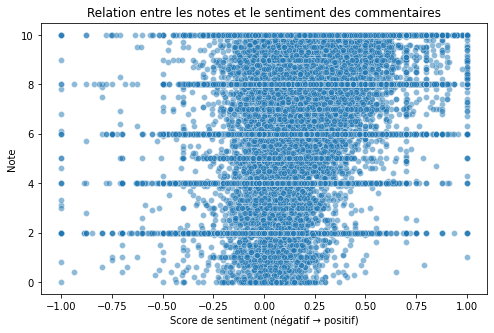

In [30]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
pdAvis_of = pdAvis


tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

pdAvis_of["sentiment"] = pdAvis_of["comment"].astype(str).apply(lambda x: tb(x).sentiment[0])  # Score de polarité (-1 à 1)

# Tracer un scatter plot pour voir la relation entre note et sentiment
plt.figure(figsize=(8,5))
sns.scatterplot(x=pdAvis_of["sentiment"], y=pdAvis_of["note"], alpha=0.5)
plt.xlabel("Score de sentiment (négatif → positif)")
plt.ylabel("Note")
plt.title("Relation entre les notes et le sentiment des commentaires")
plt.show()


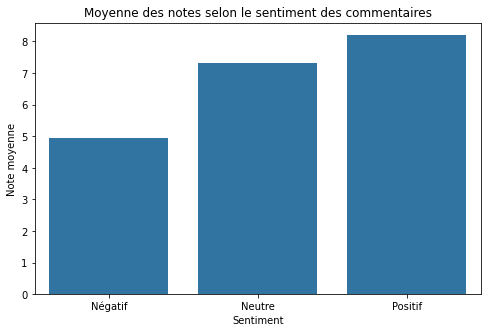

In [31]:
# Regrouper les données par tranche de sentiment
pdAvis_of["sentiment_categorie"] = pd.cut(pdAvis_of["sentiment"], bins=[-1, -0.3, 0.3, 1], labels=["Négatif", "Neutre", "Positif"])

# Calculer la moyenne des notes par sentiment
moyenne_notes = pdAvis_of.groupby("sentiment_categorie")["note"].mean()

# Afficher le graphique
plt.figure(figsize=(8,5))
sns.barplot(x=moyenne_notes.index, y=moyenne_notes.values)
plt.xlabel("Sentiment")
plt.ylabel("Note moyenne")
plt.title("Moyenne des notes selon le sentiment des commentaires")
plt.show()

In [32]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Charger les stopwords français + le mot jeu
stop_words = set(stopwords.words("french")).union({"jeu"})


# Fonction de nettoyage des commentaires
def nettoyer_texte(texte):
    if isinstance(texte, str):  # Vérifier si le texte n'est pas NaN
        texte = texte.lower()  # Convertir en minuscules
        texte = re.sub(r'\W', ' ', texte)  # Supprimer la ponctuation
        texte = re.sub(r'\s+', ' ', texte).strip()  # Supprimer les espaces inutiles
        texte = re.sub(r'\d+', '', texte)
        tokens = texte.split()  # Tokenisation simple
        tokens = [t for t in tokens if t not in stop_words]  # Supprimer les stopwords
        return " ".join(tokens)
    return ""

pdAvis_of["comment_clean"] = pdAvis_of["comment"].apply(nettoyer_texte)

print(pdAvis_of[["comment", "comment_clean"]].head())


                                             comment  \
0  Lorsque le jeu est jeu, bon, réflexif, joli po...   
1  Comment continuer après un mega hit ? Simpleme...   
2  Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...   
4  Très joli bijou que ce jeu-là ! Le matériel, l...   
5  Mariposas est plutôt beau avec un grand platea...   

                                       comment_clean  
0  lorsque bon réflexif joli sensible style illus...  
1  comment continuer après mega hit simplement ap...  
2  vin mariposas elizabeth hargrave parvient simu...  
4  très joli bijou là matériel illustrations hist...  
5  mariposas plutôt beau grand plateau petits pap...  


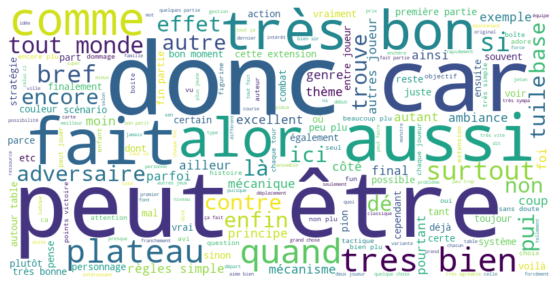

In [33]:
# Concaténer tous les commentaires nettoyés
text = " ".join(pdAvis_of["comment_clean"])


wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [34]:
df_notes_basses = pdAvis_of[pdAvis_of["note"] <= 6]  # Filtrer les notes ≤ 6
# Afficher quelques commentaires négatifs
print(df_notes_basses[["note", "comment_clean"]].head(10))

     note                                      comment_clean
13    6.0  très déçu mariposas a tendance comparer wingsp...
17    3.0  belle promesse papier a final beaucoup déçu to...
36    6.0  cause you don need anything adore mysterium cu...
53    1.0  magnifiquement réalisé jusque boîte logements ...
57    6.0  rien bien neuf sous clair lune mise place simp...
78    6.0  très déçu avis plutôt bons lancer meeple certe...
103   2.0  not alone depuis longtemps jeux préférés surto...
119   5.0  plus bonbons ludiques bel enrobage attend impa...
137   5.0  trouve hasard tirages clones failles coûte sou...
205   5.0  grand fan troyes amateur roll write bien sûr a...


In [35]:
pdAvis_of["note_categorie"].unique()

['Moyenne (7-8)', 'Haute (9-10)', 'Basse (0-6)', NaN]
Categories (3, object): ['Basse (0-6)' < 'Moyenne (7-8)' < 'Haute (9-10)']

Catégorie Moyenne (7-8): 2849695 mots


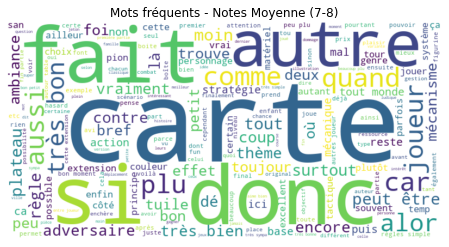

Catégorie Haute (9-10): 3210241 mots


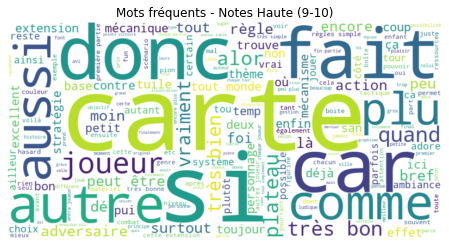

Catégorie Basse (0-6): 2586104 mots


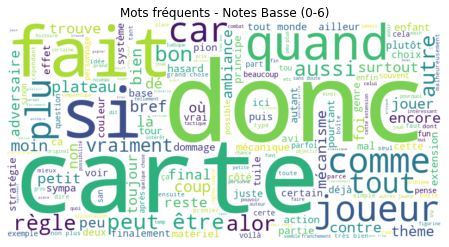

In [36]:
from wordcloud import WordCloud

# Générer un WordCloud par tranche de notes
for cat in pdAvis_of["note_categorie"].unique()[:3]:
    text = " ".join(pdAvis_of[pdAvis_of["note_categorie"] == cat]["comment_clean"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    print(f"Catégorie {cat}: {len(text.split())} mots")
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Mots fréquents - Notes {cat}")
    plt.show()


Found 38096 words that appear in all categories.
Catégorie Moyenne (7-8): 56046 word occurrences (removed 2793649 common words)


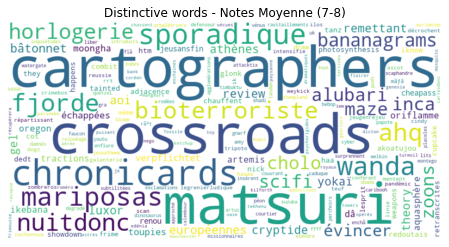

Catégorie Haute (9-10): 64219 word occurrences (removed 3146022 common words)


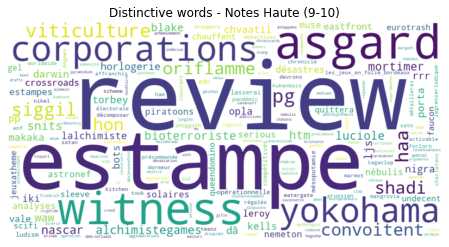

Catégorie Basse (0-6): 49067 word occurrences (removed 2537037 common words)


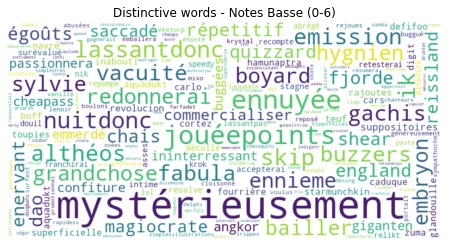

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import re

category_words = {}
for cat in pdAvis_of["note_categorie"].unique()[:3]:
    text = " ".join(pdAvis_of[pdAvis_of["note_categorie"] == cat]["comment_clean"].astype(str))
    words = re.findall(r'\b\w+\b', text.lower())
    category_words[cat] = Counter(words)

cats = list(category_words.keys())
common_words = set.intersection(*[set(category_words[cat].keys()) for cat in cats])
print(f"Found {len(common_words)} words that appear in all categories.")

for cat in pdAvis_of["note_categorie"].unique()[:3]:
    word_counts = category_words[cat].copy()
    
    for word in common_words:
        if word in word_counts:
            del word_counts[word]
    
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
    
    original_count = sum(category_words[cat].values())
    filtered_count = sum(word_counts.values())
    print(f"Catégorie {cat}: {filtered_count} word occurrences (removed {original_count - filtered_count} common words)")
    
    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Distinctive words - Notes {cat}")
    plt.show()

### Kmeans +Tfidf trial

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorisation TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(pdAvis_of["comment_clean"])



In [ ]:
from sklearn.cluster import KMeans

# Nombre de clusters (à ajuster)
num_clusters = 2

km = KMeans(n_clusters=num_clusters, random_state=42)
pdAvis_of["cluster"] = km.fit_predict(tfidf_matrix)

for i in range(num_clusters):
    print(f"\n Cluster {i} :")
    cluster_comment = pdAvis_of[pdAvis_of["cluster"] == i]["comment"].iloc[0]  # Sélectionner 1 commentaires
    cluster_note = pdAvis_of[pdAvis_of["cluster"] == i]["note"].iloc[0] 
    
    print(f"\n Commentaire:\n {cluster_comment}")
    print(f"\n Notes :\n {cluster_note}")
    print("-" * 80)



 Cluster 0 :

 Commentaire:
 Mariposas est plutôt beau avec un grand plateau, des petits papillons et plein de fleurs (jetons!).
La mécanique colle bien au thème car on se déplace en butinant pour donner naissance à de nouveaux papillons. 

Aucune de mes parties n'a été désagréable mais aucune n'a vraiment été excitante. Les choix sont limités (une carte parmi deux) et les tactiques peu nombreuses (points avec les objectifs, points en rentrant au Mexique et collection de cartes).

La cible du jeu est familiale, contrairement à Wingpan de la même créatrice qui propose des options variées , les joueurs expérimentés s'ennuieront vite. Les objectifs changent peu, le seul dilemme étant "jusqu'ou monter"?
Le jeu devient vite répétitif.

Curieusement je n'ai pas trouvé le livret de règles très bien fait pour un jeu de cette catégorie (accessible à tout public dès 8 ans). Quelques points n'ont pas été simples à éclaircir et ont nécessité des relectures (par exemple :un papillon "double 4" peu

### Visualisation

In [50]:
def preprocess(text):
    """
    Transforms text to remove unwanted bits.
    """
    punc = string.punctuation
    punc += '\n\r\t'
    text=text.lower()
    text = text.translate(str.maketrans(punc, ' ' * len(punc)))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Supprimer les mots d'une seule lettre
    text = re.sub(r'\b([a-zA-Z])\1{1,}\b', '', text) # Supprimer les mots contenant la même lettre répétée
    return text

In [45]:
allcommts = [comment for comment in pdAvis["comment"]]
print(len(allcommts))

142845


In [46]:
vectorizer = CountVectorizer(preprocessor=preprocess)
X = vectorizer.fit_transform(allcommts)
dic_size = X.shape[1]
print(dic_size)
print(vectorizer.get_feature_names_out()[:10])

136116
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh'
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhh'
 'aaaaaaaaaaaaaaaaaaaaaadore' 'aaaaaaaaaaaaaaaaaarg'
 'aaaaaaaaaaaaaaarrrgggggggghh' 'aaaaaaaaaaaaarrrrrrrrrrgggghhhh'
 'aaaaaaaaaaaah' 'aaaaaaaaaaah' 'aaaaaaaaaah' 'aaaaaaaaaahhh']


In [ ]:
#nltk.download('stopwords')
stop_words = list(set(stopwords.words("french")).union({"jeu"}))

vectorizer = TfidfVectorizer(stop_words=stop_words, preprocessor= preprocess)
X_clean = vectorizer.fit_transform(allcommts)
print(X_clean.shape)


(142845, 135981)


{'plus': 4663.855283745636, 'très': 4191.608153731274, 'bien': 3790.570568144478, 'tout': 3320.4097198152854, 'cartes': 3038.897212548165, 'bon': 2989.9212811361367, 'peu': 2955.91194203112, 'si': 2613.820919036769, 'joueurs': 2591.175528706298, 'partie': 2460.500039250946, 'jouer': 2451.068025789801, 'fait': 2426.757656957843, 'parties': 2397.6979702037224, 'peut': 2377.7164545436044, 'ça': 2304.2467278809236, 'jeux': 2183.1998721738387, 'faire': 2144.519667070697, 'trop': 2103.2544824249717, 'être': 2069.930501740148, 'petit': 2009.9540939759863, 'règles': 1995.7593514549437, 'vraiment': 1971.0327758321973, 'sans': 1953.8227661423039, 'faut': 1818.787006805489, 'simple': 1807.8456719332555, 'comme': 1784.333625351022, 'assez': 1727.5694051142534, 'donc': 1650.4476697539983, 'quand': 1647.7513859833807, 'autres': 1618.9530793155564, 'beaucoup': 1613.951744206452, 'temps': 1582.7913614465983, 'matériel': 1571.3272157983065, 'car': 1554.1764944893778, 'deux': 1534.586624849611, 'aussi':

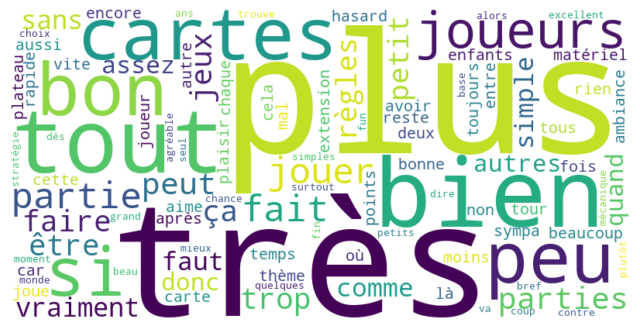

In [ ]:
word_freq = np.asarray(X_clean.sum(axis=0)).flatten()
vocab = vectorizer.get_feature_names_out()

sorted_indices = np.argsort(word_freq)[::-1]
top_100_words = {vocab[i]: word_freq[i] for i in sorted_indices[:100]}
print(top_100_words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#most common words in all the comments

### Other idea

In [139]:
def enhanced_preprocess(text, use_lemmatization=True, handle_negation=True):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.lower()

    # Rating patterns in French
    text = re.sub(r'\b\d+\/10\b', ' note_score ', text)
    text = re.sub(r'\b\d+\s*étoiles?\b', ' note_score ', text)
    text = re.sub(r'\b(une|deux|trois|quatre|cinq|six|sept|huit|neuf|dix)\s*étoiles?\b', ' note_mot ', text)

    # Sentiment indicators
    text = re.sub(r'!{2,}', ' emotion_forte ', text)
    text = re.sub(r'!', ' exclamation ', text)
    text = re.sub(r'\?+', ' question ', text)
    text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Supprimer les mots d'une seule lettre
    text = re.sub(r'\b([a-zA-Z])\1{1,}\b', '', text) # Supprimer les mots contenant la même lettre répétée

   

    # Remove URLs and HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)


    # French negation handling
    if handle_negation:
        words = text.split()
        result = []
        neg_scope = 0
        prev_word_was_ne = False
        
        for word in words:
            if word in ["ne", "n"]:
                prev_word_was_ne = True
                result.append(word)
            elif prev_word_was_ne and word in ["pas", "plus", "jamais", "point", "guère"]:
                neg_scope = 3  # Apply negation to next 3 words
                prev_word_was_ne = False
                result.append(word)
            elif word in ["sans", "aucun", "aucune", "ni", "nullement"]:
                neg_scope = 3
                result.append(word)
            elif neg_scope > 0 and word not in ['.', ',', ';', ':', '!', '?']:
                result.append('NON_' + word)
                neg_scope -= 1
            else:
                prev_word_was_ne = False
                result.append(word)

        text = ' '.join(result)

    words = word_tokenize(text)

    # French sentiment words
    french_sentiment_words = {
        'bon', 'bien', 'excellent', 'mauvais', 'terrible', 'génial', 'nul',
        'superbe', 'horrible', 'magnifique', 'adorer', 'détester', 'aimer',
        'haïr', 'apprécier', 'décevoir', 'impressionnant', 'décevant', 'formidable',
        'extraordinaire', 'délicieux', 'affreux', 'médiocre', 'passionnant', 'ennuyeux',
        'agréable', 'désagréable', 'parfait', 'pire', 'meilleur', 'recommander',
        'éviter', 'préférer', 'fascinant', 'plaisant', 'dégoûtant'
        
    }
    # Keep negation and sentiment words
    french_negation_words = {
        "ne", "pas", "plus", "jamais", "aucun", "aucune", "ni", "non", 
        "rien", "sans", "nullement", "guère", "point"
    }
    
    # Additional French stopwords + Game oriented terms
    extra_stopwords_french = {
        'est', 'sont', 'était', 'étaient', 'être', 'étant', 'été', 'fait',
        'peut', 'pourrait', 'va', 'devrait', 'juste', 'très', 'vraiment', 'assez',
        'beaucoup', 'plus', 'plupart', 'et', 'ou', 'mais', 'parce', 'donc', 'si',
        'ce', 'cette', 'ces', 'dans', 'sur', 'à', 'par', 'pour', 'de', 'avec', 
        'entre', 'chose', 'truc', 'comme', 'peut-être', 'jeu', 'jeux', 'niveau', 'niveaux', 'mission', 'quête', 'objectif',
        'mode', 'campagne', 'multijoueur', 'personnage', 'perso', 'character',
        'boss', 'ennemi', 'ennemis', 'monde', 'carte', 'map', 'arme', 'armes',
        'équipement', 'fps', 'tps', 'rpg', 'mmorpg', 'moba','jeu', 'jeux', 'jouer', 'joue', 'jouant', 'joué', 'jouée',   
        'jouées', 'joués', 'joueur', 'joueurs', 'jouable', 'jouabilité', 'rejouer','jou', 'jeux', 'plateaux', 'plateau', 'carte', 
        'cartes', 'dé', 'dés', 'pion', 'pions', 'plateau', 'vidéo', 'société', 'stratégie', 'rôle', 'aventure'
    }
    stop_words = set(stopwords.words('french'))
    stop_words |= extra_stopwords_french
    stop_words -= french_negation_words
    stop_words -= french_sentiment_words

    from nltk.stem.snowball import SnowballStemmer
    stemmer = SnowballStemmer('french')

    stop_words |= {stemmer.stem(word) for word in stop_words}
        

    processed_words = []
    
    for word in words:
        if len(word) <= 1:
            continue
            
        # First stem the word
        stemmed_word = stemmer.stem(word)
        
        # Then check if it's a stopword
        if stemmed_word.lower() in stop_words:
            continue
            
        processed_words.append(stemmed_word)

    text = ' '.join(processed_words)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/bido/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/bido/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/bido/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Categories used as labels

In [140]:
mean = pdAvis['note'].mean()
std = pdAvis['note'].std()

pdAvis['sentiment_category'] = pd.cut(
    pdAvis['note'], 
    bins=[0, mean-std, mean, mean+std,10],
    labels=['very_negative', 'negative', 'positive', 'very_positive']
)

bins = [0, mean-std, mean, mean+std, 10]
print("Bins used for categories:")
for i in range(len(bins)-1):
    print(f"{['very_negative', 'negative', 'positive', 'very_positive'][i]}: {bins[i]:.2f} to {bins[i+1]:.2f}")

ordered_counts = pdAvis['sentiment_category'].value_counts(sort=False)
print("Category distribution")
print(ordered_counts)
print()


Bins used for categories:
very_negative: 0.00 to 5.19
negative: 5.19 to 7.42
positive: 7.42 to 9.65
very_positive: 9.65 to 10.00
Category distribution
sentiment_category
very_negative    21879
negative         32980
positive         54155
very_positive    33629
Name: count, dtype: int64



In [141]:
vectorizer_VN = CountVectorizer(preprocessor=enhanced_preprocess,min_df=5,max_df=0.9,max_features=5000)
X_VN = vectorizer_VN.fit_transform(pdAvis[pdAvis['sentiment_category']=="very_negative"]['comment'])
dic_size = X_VN.shape[1]
print(dic_size)


5000


{'pas': 35675, 'est': 21889, 'ne': 18158, 'plus': 17265, 'part': 14605, 'dan': 13427, 'tout': 12833, 'cart': 12448, 'exclam': 10871, 'qu': 10505, 'bien': 10340, 'mem': 10259, 'tre': 10199, 'ca': 9251, 'ai': 8862, 'un': 8752, 'peu': 8728, 'bon': 8558, 'autr': 7132, 'trop': 6919, 'question': 6174, 'on': 6160, 'fair': 6133, 'regl': 6041, 'vrai': 6005, 'san': 5841, 'il': 5832, 'comm': 4923, 'trouv': 4641, 'quand': 4362, 'etre': 4146, 'point': 4106, 'tour': 4104, 'rien': 3945, 'moin': 3796, 'mecan': 3779, 'faut': 3722, 'pass': 3685, 'car': 3652, 'cel': 3627, 'quelqu': 3581, 'cet': 3549, 'simpl': 3512, 'grand': 3479, 'seul': 3446, 'en': 3444, 'non': 3426, 'them': 3399, 'materiel': 3304, 'alor': 3280, 'temp': 3268, 'fois': 3254, 'hasard': 3234, 'aim': 3224, 'fin': 3216, 'deux': 3191, 'chos': 3116, 'final': 3093, 'avoir': 3079, 'rest': 3031, 'aur': 2973, 'certain': 2943, 'mal': 2894, 'vit': 2869, 'encor': 2776, 'auss': 2753, 'bref': 2737, 'boit': 2720, 'coup': 2688, 'aucun': 2670, 'apre': 2634

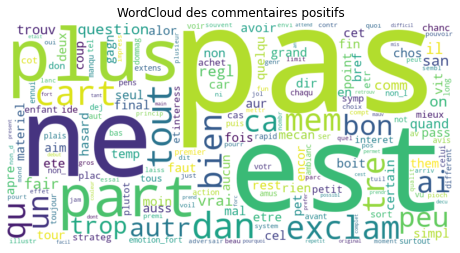

In [ ]:
word_freq_VN = np.asarray(X_VN.sum(axis=0)).flatten()
vocab_N = vectorizer_VN.get_feature_names_out()

sorted_indices = np.argsort(word_freq_VN)[::-1]
top_100_words_VN = {vocab_N[i]: word_freq_VN[i] for i in sorted_indices[:500]}
print(top_100_words_VN)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_VN)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires very negative")
plt.axis("off")
plt.show()

5000
{'pas': 46894, 'est': 30970, 'plus': 28081, 'part': 23875, 'ne': 23260, 'bien': 20072, 'tout': 19300, 'tre': 18576, 'bon': 17976, 'peu': 16886, 'exclam': 15952, 'mem': 15601, 'qu': 14665, 'un': 13011, 'ca': 12284, 'autr': 10681, 'il': 9315, 'regl': 9314, 'trop': 9132, 'on': 9105, 'ai': 9104, 'fair': 9086, 'san': 8190, 'simpl': 8064, 'pet': 7483, 'faut': 7095, 'question': 7070, 'point': 7032, 'trouv': 6725, 'quand': 6590, 'mecan': 6327, 'moin': 6283, 'temp': 6282, 'etre': 6169, 'car': 6071, 'cel': 5997, 'tour': 5923, 'rest': 5877, 'materiel': 5869, 'grand': 5738, 'quelqu': 5664, 'deux': 5442, 'them': 5341, 'certain': 5250, 'rapid': 5116, 'auss': 4981, 'pass': 4958, 'symp': 4919, 'petit': 4916, 'en': 4883, 'plac': 4578, 'fois': 4517, 'fin': 4479, 'coup': 4455, 'aim': 4450, 'hasard': 4339, 'vit': 4280, 'plais': 4260, 'alor': 4191, 'mal': 4188, 'final': 4162, 'avoir': 4158, 'sort': 4066, 'seul': 4063, 'non': 4016, 'plutot': 3976, 'boit': 3904, 'chaqu': 3723, 'rien': 3660, 'tous': 3644

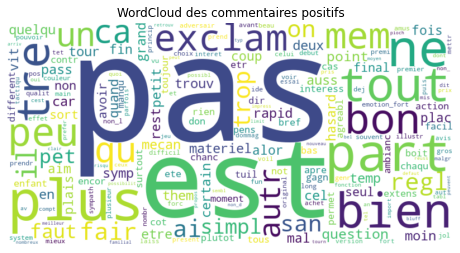

In [ ]:
vectorizer_N = CountVectorizer(preprocessor=enhanced_preprocess,min_df=5,max_df=0.9,max_features=5000)
X_N = vectorizer_N.fit_transform(pdAvis[pdAvis['sentiment_category']=="negative"]['comment'])
dic_size = X_N.shape[1]
print(dic_size)

word_freq_N = np.asarray(X_N.sum(axis=0)).flatten()
vocab_N = vectorizer_N.get_feature_names_out()

sorted_indices = np.argsort(word_freq_N)[::-1]
top_100_words_N = {vocab_N[i]: word_freq_N[i] for i in sorted_indices[:500]}
print(top_100_words_N)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_N)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires negatif")
plt.axis("off")
plt.show()


5000
{'pas': 68587, 'est': 49963, 'plus': 48931, 'tre': 42621, 'part': 42335, 'bien': 38411, 'exclam': 38139, 'tout': 37741, 'ne': 36829, 'bon': 34930, 'qu': 24978, 'mem': 24566, 'un': 23857, 'peu': 23800, 'ca': 18911, 'regl': 18206, 'autr': 17813, 'fair': 16435, 'simpl': 16094, 'il': 15999, 'on': 15763, 'ai': 14715, 'faut': 13881, 'point': 13694, 'san': 12618, 'pet': 12332, 'tour': 11270, 'mecan': 11221, 'auss': 11101, 'question': 11092, 'deux': 10592, 'grand': 10543, 'car': 10467, 'quand': 10391, 'etre': 10363, 'materiel': 10248, 'trop': 10062, 'trouv': 9931, 'rapid': 9900, 'moin': 9861, 'cel': 9698, 'petit': 9352, 'plac': 9345, 'certain': 8996, 'chaqu': 8962, 'aim': 8898, 'them': 8854, 'plais': 8820, 'seul': 8733, 'temp': 8402, 'fois': 8373, 'fin': 8359, 'quelqu': 8249, 'coup': 7913, 'en': 7897, 'tous': 7689, 'different': 7666, 'rest': 7479, 'pass': 7394, 'extens': 7348, 'avoir': 7326, 'boit': 7301, 'action': 7197, 'encor': 7171, 'toujour': 7132, 'sort': 6645, 'alor': 6483, 'facil':

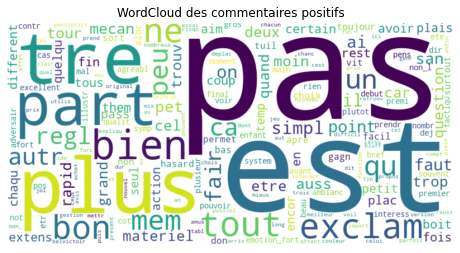

In [ ]:
vectorizer_P = CountVectorizer(preprocessor=enhanced_preprocess,min_df=5,max_df=0.9,max_features=5000)
X_P = vectorizer_P.fit_transform(pdAvis[pdAvis['sentiment_category']=="positive"]['comment'])
dic_size = X_P.shape[1]
print(dic_size)

word_freq_P = np.asarray(X_P.sum(axis=0)).flatten()
vocab_P = vectorizer_P.get_feature_names_out()

sorted_indices = np.argsort(word_freq_P)[::-1]
top_100_words_P = {vocab_P[i]: word_freq_P[i] for i in sorted_indices[:500]}
print(top_100_words_P)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_P)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires positifs")
plt.axis("off")
plt.show()


5000
{'parol': 39140, 'eurogam': 32602, 'equivalent': 32476, 'plaquet': 31356, 'parametr': 27224, 'tourn': 27213, 'traqu': 26480, 'nai': 22779, 'biensur': 22203, 'bond': 17963, 'puc': 16575, 'unanimit': 16419, 'mecanismes': 14287, 'refair': 12117, 'persos': 11444, 'build': 11283, 'aux': 10848, 'ailleur': 10713, 'officiel': 10289, 'ident': 10043, 'extension': 10037, 'sien': 10023, 'fait': 8337, 'sag': 7994, 'global': 7760, 'auster': 7749, 'plum': 7263, 'qualit': 7190, 'total': 6814, 'capacit': 6695, 'match': 6678, 'detail': 6491, 'eleph': 6412, 'chaotiqu': 6207, 'puissanc': 6092, 'est': 6043, 'finit': 5916, 'marketing': 5911, 'exercic': 5801, 'caylus': 5778, 'serre': 5769, 'eloign': 5722, 'trop': 5689, 'emble': 5614, 'persever': 5594, 'pis': 5569, 'ains': 5522, 'tourist': 5521, 'cors': 5512, 'etroit': 5492, 'personnages': 5482, 'pinceau': 5352, 'devient': 5342, 'miser': 5178, 'tavern': 5170, 'racont': 5161, 'troisiem': 5096, 'cerebral': 4976, 'feront': 4969, 'awal': 4917, 'tot': 4912, '

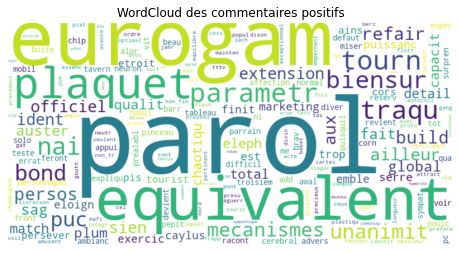

In [ ]:
vectorizer_VP = CountVectorizer(preprocessor=enhanced_preprocess,min_df=5,max_df=0.9,max_features=5000)
X_VP = vectorizer_VP.fit_transform(pdAvis[pdAvis['sentiment_category']=="very_positive"]['comment'])
dic_size = X_VP.shape[1]
print(dic_size)

word_freq_VP = np.asarray(X_VP.sum(axis=0)).flatten()
vocab_VP = vectorizer_VP.get_feature_names_out()

sorted_indices = np.argsort(word_freq_VP)[::-1]
top_100_words_VP = {vocab_P[i]: word_freq_VP[i] for i in sorted_indices[:500]}
print(top_100_words_VP)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(top_100_words_VP)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("WordCloud des commentaires very positifs")
plt.axis("off")
plt.show()


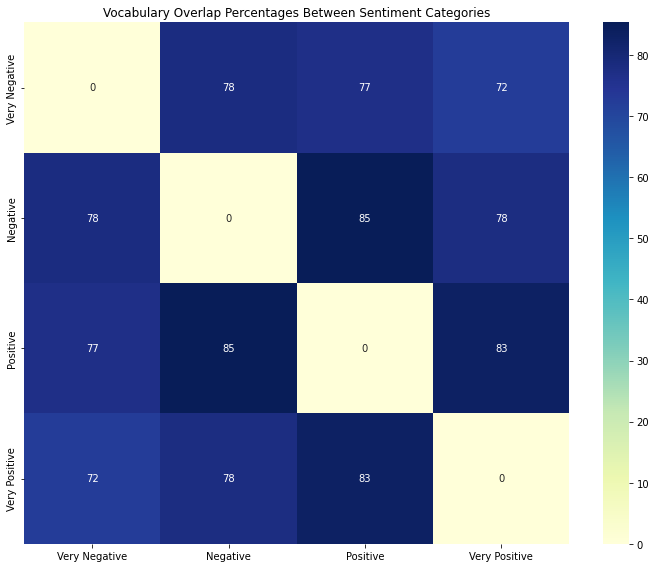

In [ ]:
vocab_vn = set(vectorizer_VN.get_feature_names_out()[:1000])
vocab_n = set(vectorizer_N.get_feature_names_out()[:1000])
vocab_p = set(vectorizer_P.get_feature_names_out()[:1000])
vocab_vp = set(vectorizer_VP.get_feature_names_out()[:1000])

vocab = [vocab_vn, vocab_n, vocab_p, vocab_vp]
vocab_names = ["Very Negative", "Negative", "Positive", "Very Positive"]


overlap_matrix = np.zeros((4, 4))

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):  
        intersection = vocab[i] & vocab[j]
        union = vocab[i] | vocab[j]
        
        overlap_count = len(intersection)
        overlap_percent = (overlap_count / len(union)) * 100
        
        percent_i_in_j = (overlap_count / len(vocab[i])) * 100
        percent_j_in_i = (overlap_count / len(vocab[j])) * 100
        
        overlap_matrix[i, j] = overlap_percent
        overlap_matrix[j, i] = overlap_percent

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=vocab_names, yticklabels=vocab_names)
plt.title("Vocabulary Overlap Percentages Between Sentiment Categories")
plt.tight_layout()
plt.show()

Number of NaN values in sentiment_category: 202


In [158]:
pdAvis = pdAvis.dropna(subset=['sentiment_category'])
tfidf = TfidfVectorizer(
    preprocessor=enhanced_preprocess,
    max_features=50000,
    min_df=5,
    max_df= 0.8
)

X = pdAvis['comment']
y = pdAvis['sentiment_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression(max_iter=1000, class_weight='balanced', C=10, solver='saga', multi_class='multinomial')
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision {precision}, recall {recall}, f1 {f1}, accuracy {accuracy}")



Precision 0.49224124786169954, recall 0.48873076518630165, f1 0.4867249503405511, accuracy 0.48873076518630165


In [159]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     negative       0.41      0.43      0.42      6596
     positive       0.53      0.43      0.47     10831
very_negative       0.51      0.63      0.56      4376
very_positive       0.49      0.56      0.52      6726

     accuracy                           0.49     28529
    macro avg       0.49      0.51      0.49     28529
 weighted avg       0.49      0.49      0.49     28529



<Axes: >

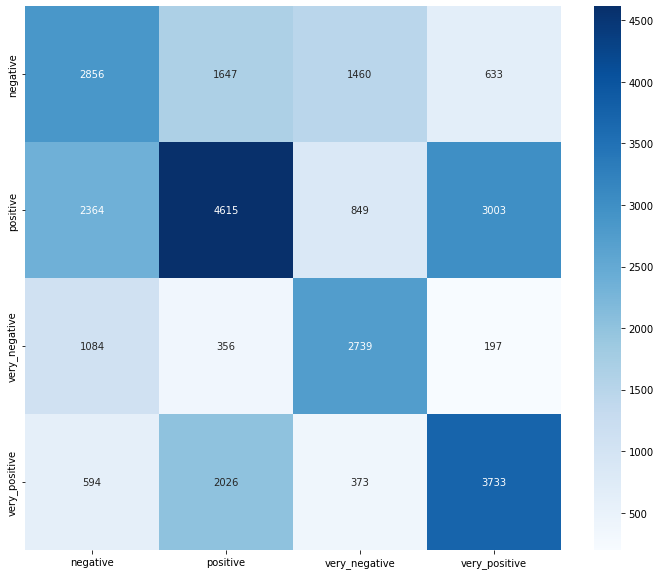

In [ ]:
cm = confusion_matrix(y_test, y_pred)



plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))

# Most confused True : Negative -> Pred : Positive
# True : Postive -> Pred : Very Positive
# True : very negative -> Pred : negative
# True : very positive -> Pred : positive
